In [3]:
import numpy as np
import importlib
import sys
sys.path.append('../../')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/time_equilibration_Nlinker/"
import data_1_in
importlib.reload(data_1_in)
from data_1_in import *
def curate_data(X,Y,imin,imax,window_size=10):
    X,Y = X[:imax],Y[:imax]
    X,Y = X[imin:],Y[imin:]
    X,Y = sliding_average(X,Y,window_size=window_size)
    Y = (Y - np.mean(Y[-len(Y)//10:]))/(np.mean(Y[:10])- np.mean(Y[-len(Y)//10:]))
    return X,Y

In [45]:
NAMEs = ['N2','N5','N20','N50','N2_LE4','N15_L10E4'] 

In [50]:
NRGs[-2].average(num_bins=NRGs[-2].attributes['step_tot']//50,log_scale=True)

In [26]:
NRGs = [Data_Treatement(media+name+'.hdf',data_type='NRG') for name in NAMEs]
for NRG in NRGs:
    NRG.average(num_bins=NRG.attributes['step_tot']//50,log_scale=True)

In [54]:
NRGs[3].attributes

{'ell_tot': 1000,
 'Energy': -15,
 'kdiff': 0.1,
 'seed': 595969,
 'Nlinker': 50,
 'dimension': 3,
 'step_tot': 500000,
 'check_steps': 20000,
 'coarse_grained_step': 10,
 'cluster_max_distance': (3.0,),
 'MSD_args': (),
 'ISF_arg': (1.0, 10),
 'NRG_args': (),
 'PCF_arg': (15.811388300841896, 50),
 'PCF_L_arg': (1000, 30),
 'log_base': False}

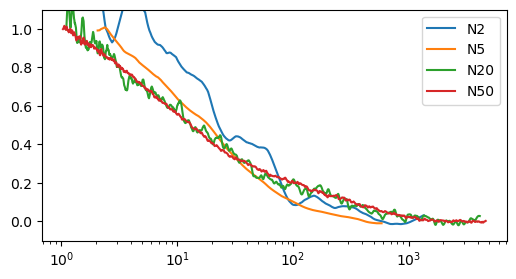

In [59]:
fig,ax = plt.subplots(ncols=1,figsize=(6,3))
for n,NRG in enumerate(NRGs[:4]):
    #ax[0].plot(NRG.binned_time,NRG.average_data/NRG.attributes['ell_tot'],label=NAMEs[n])
    X,Y = curate_data(NRG.binned_time,NRG.average_data,10,-20,window_size=20)
    X,Y = curate_data(X,Y,10,-20,window_size=20)
    ax.plot(X,Y,label=NAMEs[n])
    ax.set_xscale('log')
    ax.set_ylim(-0.1,1.1)
ax.legend()